## Tablular Data

In [4]:
import numpy as np
import pandas as pd

## Series: a column of data with an Index

In [9]:
s1 = pd.Series([1, 3, 5, np.nan, 6, 8])
s1

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [10]:
s2 = pd.Series([10, 20, 30], index=[2, 3, 4])
s2

2    10
3    20
4    30
dtype: int64

The index _aligns_ the two datasets, comparing "apples to apples".

In [11]:
s1 + s2

0     NaN
1     NaN
2    15.0
3     NaN
4    36.0
5     NaN
dtype: float64

## DataFrame: a table of columns with an Index

In [15]:
df = pd.DataFrame({"a": np.arange(100), "b": np.random.random(100)})
df

,a,b
0,0,0.021700
1,1,0.571916
2,2,0.943367
3,3,0.762479
4,4,0.893559
...,...,...
95,95,0.536255
96,96,0.112918
97,97,0.988750
98,98,0.374512


In [16]:
df.head()

,a,b
0,0,0.021700
1,1,0.571916
2,2,0.943367
3,3,0.762479
4,4,0.893559


In [21]:
df["a"]

0      0
1      1
2      2
3      3
4      4
      ..
95    95
96    96
97    97
98    98
99    99
Name: a, Length: 100, dtype: int64

In [36]:
df["c"] = np.cos(df["a"] / 10)
df.head()

,a,b,c
0,0,0.021700,1.000000
1,1,0.571916,0.995004
2,2,0.943367,0.980067
3,3,0.762479,0.955336
4,4,0.893559,0.921061


In [49]:
masked = df[df["c"] > 0.5]
masked

,a,b,c
0,0,0.021700,1.000000
1,1,0.571916,0.995004
2,2,0.943367,0.980067
3,3,0.762479,0.955336
4,4,0.893559,0.921061
5,5,0.280620,0.877583
6,6,0.074905,0.825336
7,7,0.006715,0.764842
8,8,0.546949,0.696707
9,9,0.784740,0.621610


## Pandas is good at data manipluation, filtering, and basic stats

In [18]:
df.sum()

a    4950.000000
b      47.632534
dtype: float64

In [17]:
df.describe()

,a,b
count,100.000000,100.000000
mean,49.500000,0.476325
std,29.011492,0.294647
min,0.000000,0.006715
25%,24.750000,0.228288
50%,49.500000,0.470454
75%,74.250000,0.760325
max,99.000000,0.988750


In [42]:
binned = np.digitize(df["a"], bins=np.arange(0, 100, 10))
binned

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

In [43]:
avg_per_bin = df.groupby(binned).mean()
avg_per_bin

,a,b,c
1,4.5,0.488695,0.863755
2,14.5,0.471454,0.115592
3,24.5,0.426544,-0.738845
4,34.5,0.365475,-0.913992
5,44.5,0.411681,-0.248819
6,54.5,0.530656,0.645117
7,64.5,0.556863,0.945935
8,74.5,0.575423,0.377065
9,84.5,0.464790,-0.538477
10,94.5,0.471672,-0.958946


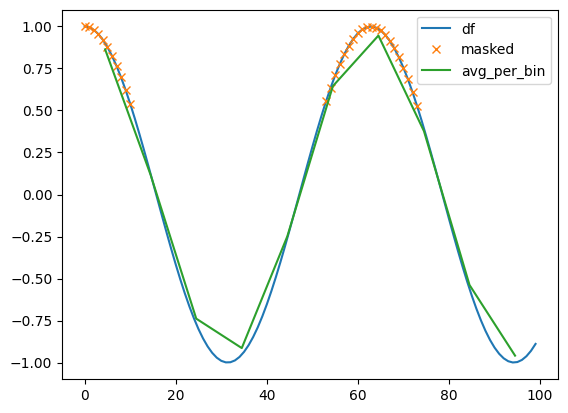

In [51]:
%matplotlib inline

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(df["a"], df["c"], label="df")
ax.plot(masked["a"], masked["c"], label="masked", marker="x", linestyle="none")
ax.plot(avg_per_bin["a"], avg_per_bin["c"], label="avg_per_bin")
ax.legend()

## Reshaping

In [81]:
experiments = pd.DataFrame(
    {
        "sample": ["Ni", "Ni", "Au", "Au", "Ag", "Ag", "Ag", "Fe", "Fe"],
        "temp": [273, 253, 272, 251, 275, 250, 273, 271, 253],
        "operator": ["Jane", "Jane", "Jane", "Jane", "Joe", "Joe", "Joe", "Chris", "Chris"],
        "measurement": [10, 11, 10, 9, 11, 9, 10, 13, 11],
    }
)
experiments

,sample,temp,operator,measurement
0,Ni,273,Jane,10
1,Ni,253,Jane,11
2,Au,272,Jane,10
3,Au,251,Jane,9
4,Ag,275,Joe,11
5,Ag,250,Joe,9
6,Ag,273,Joe,10
7,Fe,271,Chris,13
8,Fe,253,Chris,11


In [83]:
pivoted = pd.pivot_table(experiments, index=["sample", "temp"], columns=["operator"])
pivoted

measurement            
operator          Chris  Jane   Joe
sample temp                        
Ag     250          NaN   NaN   9.0
       273          NaN   NaN  10.0
       275          NaN   NaN  11.0
Au     251          NaN   9.0   NaN
       272          NaN  10.0   NaN
Fe     253         11.0   NaN   NaN
       271         13.0   NaN   NaN
Ni     253          NaN  11.0   NaN
       273          NaN  10.0   NaN

In [84]:
pivoted.stack()

measurement
sample temp operator             
Ag     250  Joe               9.0
       273  Joe              10.0
       275  Joe              11.0
Au     251  Jane              9.0
       272  Jane             10.0
Fe     253  Chris            11.0
       271  Chris            13.0
Ni     253  Jane             11.0
       273  Jane             10.0

In [85]:
pivoted.unstack()

measurement                                              ...        \
operator       Chris                             Jane             ...         
temp             250 251   253   271 272 273 275  250  251   253  ...   272   
sample                                                            ...         
Ag               NaN NaN   NaN   NaN NaN NaN NaN  NaN  NaN   NaN  ...   NaN   
Au               NaN NaN   NaN   NaN NaN NaN NaN  NaN  9.0   NaN  ...  10.0   
Fe               NaN NaN  11.0  13.0 NaN NaN NaN  NaN  NaN   NaN  ...   NaN   
Ni               NaN NaN   NaN   NaN NaN NaN NaN  NaN  NaN  11.0  ...   NaN   

                                                     
operator            Joe                              
temp       273 275  250 251 253 271 272   273   275  
sample                                               
Ag         NaN NaN  9.0 NaN NaN NaN NaN  10.0  11.0  
Au         NaN NaN  NaN NaN NaN NaN NaN   NaN   NaN  
Fe         NaN NaN  NaN NaN NaN NaN NaN   NaN   NaN  
Ni        10.0 NaN  NaN NaN NaN NaN NaN   NaN   NaN  

[4 rows x 21 columns]

## Anatomy of a DataFrame

In [52]:
df.columns

Index(['a', 'b', 'c'], dtype='object')

In [53]:
df.index

RangeIndex(start=0, stop=100, step=1)

Column-wise access is fast; row-wise access is slow.

In [57]:
# This will be comparatively slow. On small tables it may not matter.
for index, row in df.iterrows():
    ...

Is a DataFrame 1-dimensional or 2-dimensional?

In [73]:
df.head()

,a,b,c
0,0,0.021700,1.000000
1,1,0.571916,0.995004
2,2,0.943367,0.980067
3,3,0.762479,0.955336
4,4,0.893559,0.921061


## Peeking under the hood, just for a moment

Pandas is more complex inside than numpy.

Underlying data is organized into "blocks" of like data type. Sometimes the blocks store numpy arrays; sometimes they store something more specialized.

In [60]:
df._data

BlockManager
Items: Index(['a', 'b', 'c'], dtype='object')
Axis 1: RangeIndex(start=0, stop=100, step=1)
NumericBlock: slice(1, 3, 1), 2 x 100, dtype: float64
NumericBlock: slice(0, 1, 1), 1 x 100, dtype: int64

In [66]:
df._data.blocks

(NumericBlock: slice(1, 3, 1), 2 x 100, dtype: float64,
 NumericBlock: slice(0, 1, 1), 1 x 100, dtype: int64)

In [71]:
df._data.blocks[0].values

array([[ 0.02169961,  0.57191617,  0.94336744,  0.76247875,  0.89355944,
         0.28061985,  0.07490485,  0.00671478,  0.54694905,  0.78474025,
         0.73526894,  0.13130981,  0.3284698 ,  0.19313359,  0.67364605,
         0.46469555,  0.25197018,  0.6480102 ,  0.90820986,  0.37982242,
         0.50418041,  0.1394719 ,  0.177409  ,  0.09648807,  0.57920907,
         0.12140765,  0.77264377,  0.62380269,  0.84016833,  0.4106641 ,
         0.36880325,  0.28877727,  0.59150967,  0.38334719,  0.286111  ,
         0.52722373,  0.00834346,  0.09297144,  0.15996142,  0.94769908,
         0.02287614,  0.23246116,  0.90280447,  0.18027103,  0.89933323,
         0.32089887,  0.89943022,  0.03315442,  0.41586305,  0.20971634,
         0.75960768,  0.42505656,  0.15423074,  0.17833109,  0.97027914,
         0.55537967,  0.84947565,  0.06996517,  0.51941796,  0.82481572,
         0.35218439,  0.32923343,  0.89744524,  0.47621268,  0.60256269,
         0.28589414,  0.91420016,  0.50798777,  0.8

## Limitations and Coping Strategies

* The index can get in the way if you don't actually need an index.
  * Consider a simple dict or other container of numpy arrays.
  * Consider xarray.
* Pandas has a large interface and can be confusing.
  * StackOverflow!
* Whereas numpy just has array, pandas has Series and DataFrame. It can take some getting used to know what to expect.
  * Work with toy examples at first.
* Pandas DataFrames are designed for _tabular_ data. It does not perform well with higher-dimensional data.
  * Consider xarray.